In [48]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np

import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path='C:\\Dmitry\\machine learning\\Women celebrity\\rihanna images - Google Search\\_url=https_3A_2F_2Fcalifornia-times-brightspot.s3.amazonaws.jpg'

image = cv2.imread(path)


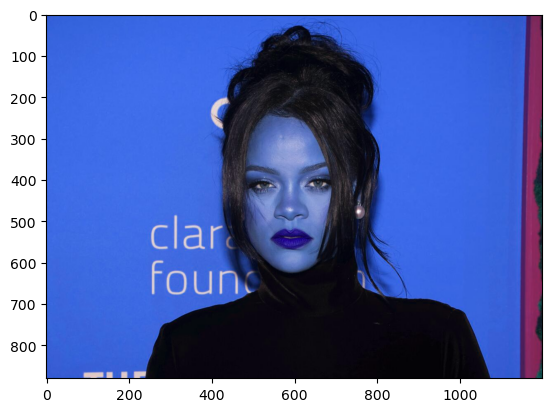

In [ ]:
plt.imshow(image)

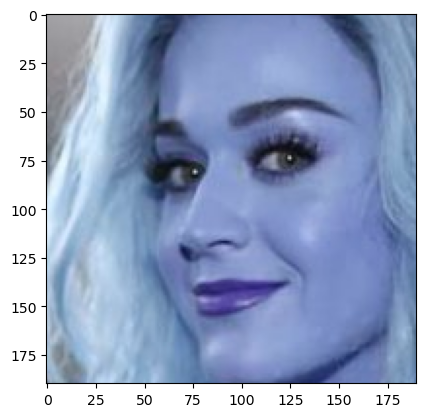

In [62]:
path="C:\\Python Project\\project 1\\images\\katy perry images - Google Search6.png"

image = cv2.imread(path)

plt.imshow(image)

In [63]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(190, 190)

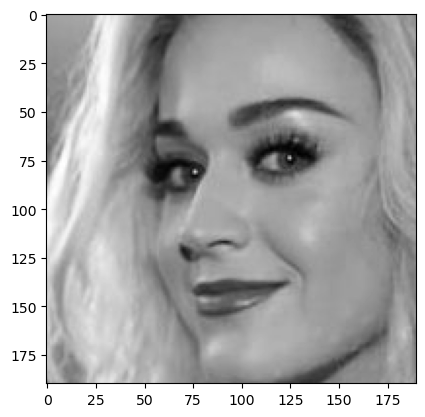

In [64]:
plt.imshow(gray, cmap='gray')

In [2]:
face_cas = cv2.CascadeClassifier('C:\\Users\\mirzadsr\\AppData\\Roaming\\Python\\Python311\\site-packages\\cv2\\data\\haarcascade_frontalface_default.xml')
eye_cas= cv2.CascadeClassifier("C:\\Users\\mirzadsr\\AppData\\Roaming\\Python\\Python311\\site-packages\\cv2\\data\\\\haarcascade_eye.xml")



In [3]:
faces = face_cas.detectMultiScale(gray, 1.3, 2)
(x,y,w,h) = faces[0]
x,y,w,h
face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

NameError: name 'gray' is not defined

In [4]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cas.detectMultiScale(roi_gray)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)


plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

NameError: name 'faces' is not defined

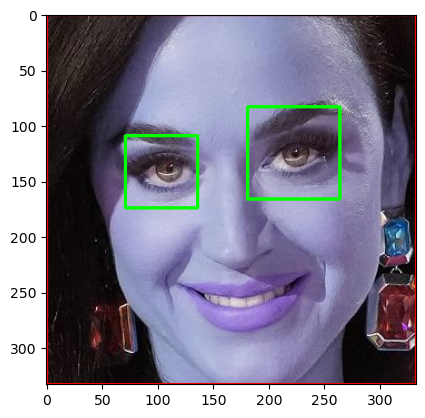

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
faces

array([[383, 218, 333, 333]])

In [5]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [ ]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

NameError: name 'cropped_img' is not defined

# Preprocessing

We use this python function which takes the picture and return cropped image if more than 2 eyes are detected:


In [6]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cas.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cas.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

For example consider the follwing image:

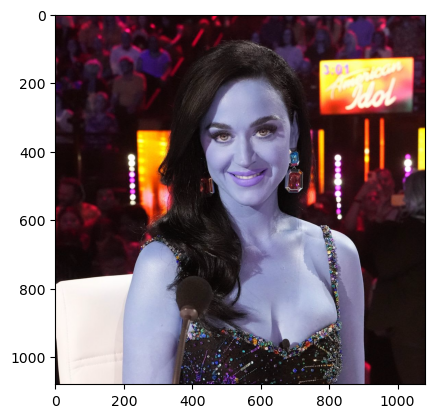

In [43]:
path="C:\\Python Project\Women celebrity\\katy perry images - Google Search\\45fc2f925862-katy-perry-idol.jpg"
image=cv2.imread(path)
plt.imshow(image)

In [46]:

cropped_image = get_cropped_image_if_2_eyes(path)
plt.imshow(cropped_image)



error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


However, in the following picture the eyes are not clear, so our function will return None, which means that we have to ignore this image:

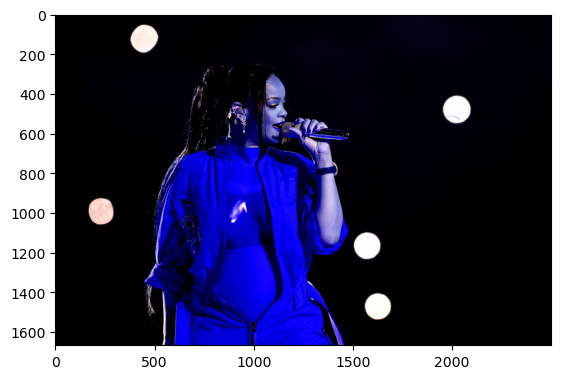

In [ ]:
path=path="C:\\Dmitry\\machine learning\\Women celebrity\\rihanna images - Google Search\\230212-super-bowl-rihanna-jm-2130-fa1ea3.jpg"
image=cv2.imread(path)
plt.imshow(image)


In [ ]:
cropped_image = get_cropped_image_if_2_eyes(path)
cropped_image


In [ ]:
print(cropped_image)

None


Now we would like to use our function and go through all the pictures of Rihana and Kathy Perry and get the cropped image of all images and save them in a new folder.

In [ ]:
path_to_data = "C:\\Dmitry\\machine learning\\Women celebrity"
path_to_cr_data = "C:\\Dmitry\\machine learning\\Women celebrity\\cropped"


In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['C:\\Dmitry\\machine learning\\Women celebrity\\beyonce pictures - Google Search',
 'C:\\Dmitry\\machine learning\\Women celebrity\\cropped',
 'C:\\Dmitry\\machine learning\\Women celebrity\\katy perry images - Google Search',
 'C:\\Dmitry\\machine learning\\Women celebrity\\lady gaga pictures - Google Search',
 'C:\\Dmitry\\machine learning\\Women celebrity\\rihanna images - Google Search']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

KeyboardInterrupt: 

In [7]:
cropped_image_dirs=["C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry",
 'C:\\Users\\mirzadsr\\Python Projects\\cropped\\rihanna', 'C:\\Users\\mirzadsr\\Python Projects\\cropped\\lady gaga','C:\\Users\\mirzadsr\\Python Projects\\cropped\\beyonce']

In [8]:
import os
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'katy perry': ['C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\\katy perry images - Google Search1.png',
  'C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\\katy perry images - Google Search10.png',
  'C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\\katy perry images - Google Search12.png',
  'C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\\katy perry images - Google Search14.png',
  'C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\\katy perry images - Google Search16.png',
  'C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\\katy perry images - Google Search20.png',
  'C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\\katy perry images - Google Search21.png',
  'C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\\katy perry images - Google Search24.png',
  'C:\\Users\\mirzadsr\\Python Projects\\cropped\\katy perry\\katy perry images - Google Search27.png',
  'C:\\Users\\mirzadsr\\Python Projects\\cropped\\k

In [9]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'katy perry': 0, 'rihanna': 1, 'lady gaga': 2, 'beyonce': 3}

# Training the model

In [10]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
X

[array([[ 87],
        [ 82],
        [ 82],
        ...,
        [228],
        [152],
        [152]], dtype=uint8),
 array([[177],
        [ 84],
        [ 61],
        ...,
        [ 97],
        [ 15],
        [169]], dtype=uint8),
 array([[254],
        [219],
        [151],
        ...,
        [  6],
        [  0],
        [  1]], dtype=uint8),
 array([[144],
        [184],
        [198],
        ...,
        [  0],
        [  0],
        [  0]], dtype=uint8),
 array([[161],
        [183],
        [195],
        ...,
        [116],
        [207],
        [ 64]], dtype=uint8),
 array([[ 40],
        [ 93],
        [150],
        ...,
        [ 25],
        [ 31],
        [246]], dtype=uint8),
 array([[ 66],
        [ 55],
        [135],
        ...,
        [236],
        [225],
        [ 74]], dtype=uint8),
 array([[39],
        [31],
        [31],
        ...,
        [44],
        [ 3],
        [ 1]], dtype=uint8),
 array([[ 36],
        [ 32],
        [ 45],
        ...,
    

In [13]:
len(X[0])

4096

In [15]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(179, 4096)

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model=SVC(kernel='rbf',C=10)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.8

In [16]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.69      0.82      0.75        11
           2       0.89      0.80      0.84        10
           3       0.92      0.79      0.85        14

    accuracy                           0.80        45
   macro avg       0.81      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier







classifiers = {
    "Random Forest": (RandomForestClassifier(),
                       {'n_estimators': [10, 50, 100],
                        'max_depth': [None, 10, 20, 30]}),

    "SVM": (SVC(),
            {'C': [0.1, 1, 10, 1000],
             'kernel': ['linear', 'rbf']}),

    "Logistic Regression": (LogisticRegression(),
                            {'C': [0.1, 1, 10],
                             'penalty': ['l1', 'l2']}),

    "K-Nearest Neighbors": (KNeighborsClassifier(),
                            {'n_neighbors': [3, 5, 7],
                             'weights': ['uniform', 'distance']}),

    "Decision Tree": (DecisionTreeClassifier(),
                      {'max_depth': [None, 10, 20, 30],
                       'min_samples_split': [2, 5, 10]})

}


In [21]:
# Create an empty DataFrame to store results
import pandas as pd
results_df = pd.DataFrame(columns=['Model', 'Best Parameters', 'Best Score'])

# Loop through the classifiers and perform GridSearchCV
scaler = StandardScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Loop through the classifiers and perform GridSearchCV
for name, (model, param_grid) in classifiers.items():
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train_scaled, y_train)
    y_pred = grid_search.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))

    # Store results in the DataFrame
    results_df = results_df.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': accuracy}, ignore_index=True)
    print(results_df)

# Sort the DataFrame by the best score in descending order
results_df = results_df.sort_values(by='Best Score', ascending=False)

# Display the results
print(results_df)












              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.64      0.82      0.72        11
           2       0.78      0.70      0.74        10
           3       0.91      0.71      0.80        14

    accuracy                           0.76        45
   macro avg       0.76      0.76      0.75        45
weighted avg       0.77      0.76      0.76        45

           Model                         Best Parameters  Best Score
0  Random Forest  {'max_depth': 10, 'n_estimators': 100}    0.755556


C:\Users\local_mirzadsr\Temp\ipykernel_7884\3844184962.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': accuracy}, ignore_index=True)


              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.73      0.73      0.73        11
           2       1.00      0.90      0.95        10
           3       0.85      0.79      0.81        14

    accuracy                           0.82        45
   macro avg       0.83      0.83      0.83        45
weighted avg       0.83      0.82      0.82        45

           Model                         Best Parameters  Best Score
0  Random Forest  {'max_depth': 10, 'n_estimators': 100}    0.755556
1            SVM          {'C': 0.1, 'kernel': 'linear'}    0.822222


C:\Users\local_mirzadsr\Temp\ipykernel_7884\3844184962.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': accuracy}, ignore_index=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.67      0.73      0.70        11
           2       0.88      0.70      0.78        10
           3       0.71      0.71      0.71        14

    accuracy                           0.76        45
   macro avg       0.77      0.76      0.76        45
weighted avg       0.76      0.76      0.76        45

                 Model                         Best Parameters  Best Score
0        Random Forest  {'max_depth': 10, 'n_estimators': 100}    0.755556
1                  SVM          {'C': 0.1, 'kernel': 'linear'}    0.822222
2  Logistic Regression             {'C': 0.1, 'penalty': 'l2'}    0.755556
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.56      0.45      0.50        11
           2       0.73      0.80      0.76        10
           3       0.68      0.93      0.79     

C:\Users\local_mirzadsr\Temp\ipykernel_7884\3844184962.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': accuracy}, ignore_index=True)


              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.44      0.73      0.55        11
           2       0.62      0.50      0.56        10
           3       0.67      0.43      0.52        14

    accuracy                           0.51        45
   macro avg       0.53      0.51      0.51        45
weighted avg       0.54      0.51      0.51        45

                 Model                            Best Parameters  Best Score
0        Random Forest     {'max_depth': 10, 'n_estimators': 100}    0.755556
1                  SVM             {'C': 0.1, 'kernel': 'linear'}    0.822222
2  Logistic Regression                {'C': 0.1, 'penalty': 'l2'}    0.755556
3  K-Nearest Neighbors  {'n_neighbors': 3, 'weights': 'distance'}    0.688889
4        Decision Tree  {'max_depth': 10, 'min_samples_split': 2}    0.511111
                 Model                            Best Parameters  Best Score
1                  

C:\Users\local_mirzadsr\Temp\ipykernel_7884\3844184962.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Model': name, 'Best Parameters': grid_search.best_params_, 'Best Score': accuracy}, ignore_index=True)


In [30]:
results_df['Best Parameters'][1]

{'C': 0.1, 'kernel': 'linear'}

In [28]:


model=Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 0.1, probability=True))])

In [29]:
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=0.1, kernel='linear', probability=True))])

In [30]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.73      0.73      0.73        11
           2       1.00      0.90      0.95        10
           3       0.85      0.79      0.81        14

    accuracy                           0.82        45
   macro avg       0.83      0.83      0.83        45
weighted avg       0.83      0.82      0.82        45



In [31]:
import pickle
with open('model_pickle','wb') as f:
    pickle.dump(model,f)